# Zastosowanie drzew decyzyjnych oraz lasów losowych przy, gdzie y reprezentowany jest przez dane typu ciągłego**


## 1. Biblioteki

In [1]:
import pandas as pd
import sklearn.tree
import numpy as np
from sklearn.ensemble import RandomForestClassifier  #ładowanie fukcji do tworzenia instacji drzew dla Y ciaglego
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold


from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score




## 2. Wczytuje  i sprawdzam typ danych

In [2]:
train_df=pd.read_csv("C:/Users/Marze/OneDrive/Dokumenty/Jarek/Modele/Dane pierwotne/Dane_do_uczenia_N.csv", encoding="utf-8")
del train_df['Unnamed: 0']

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Marze/OneDrive/Dokumenty/Jarek/Modele/Dane pierwotne/Dane_do_uczenia_N.csv'

In [ ]:
train_df

In [ ]:
train_df=train_df.loc[(train_df['scale']!='NX')]

In [ ]:
train_df

In [ ]:
train_df['scale'].value_counts()

In [3]:
y=train_df['scale']
del train_df['scale']

NameError: name 'train_df' is not defined

In [8]:
train_df

,ENSG00000143512.11,ENSG00000130433.6,ENSG00000088726.14,ENSG00000149948.12,ENSG00000147689.15,ENSG00000181143.14,ENSG00000105278.9,ENSG00000086506.2,ENSG00000124102.4,ENSG00000175793.11,...,ENSG00000203837.4,ENSG00000222024.2,ENSG00000255043.1,ENSG00000229418.2,ENSG00000249518.1,ENSG00000279301.1,ENSG00000251276.1,ENSG00000217236.1,ENSG00000046774.9,ENSG00000260958.2
0,13.858287,0.000000,1.154857,24.252002,4.619429,4105.517523,0.000000,0.000000,10.393715,120.105154,...,0.000000,38.110289,13.858287,0.000000,32.336003,0.000000,3.464572,0.000000,0.000000,0.0
1,1.070588,0.000000,2.141177,1.070588,1.070588,28.905887,0.000000,0.000000,4.282354,44.964713,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.070588,2.141177,0.000000,0.000000,0.0
2,2.947029,17.682172,3.683786,13.998386,2.210272,42.731916,319.015856,1.473514,13.261629,375.009401,...,0.000000,0.000000,0.000000,0.000000,8.841086,0.000000,0.000000,0.736757,0.000000,0.0
3,0.510553,4.594978,1.531659,14.806042,2.042213,0.510553,10.211063,1.021106,12.763829,320.627385,...,1.021106,0.000000,1.021106,0.510553,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,2.145565,2.860754,15.734146,207.404649,0.715188,69.373279,1.430377,1.430377,745.941546,949.770253,...,0.000000,0.000000,0.000000,0.000000,0.715188,0.000000,0.715188,0.000000,0.715188,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,34.548309,0.822579,18.096733,547.837468,9.870945,2.467736,805.304626,314.225094,536.321365,37832.865830,...,0.822579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.645158,0.000000,0.0
407,5.160331,0.000000,2.948761,56.026453,1.474380,11.057853,16.955374,2.948761,43.494220,2322.886229,...,0.737190,0.737190,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
408,0.000000,0.000000,2.985051,7.960137,0.995017,3.980069,1.990034,0.995017,0.000000,35.820617,...,6.965120,0.000000,0.000000,49.750857,0.000000,0.000000,0.000000,0.995017,0.000000,0.0
409,13.307318,5.322927,29.276099,1189.674187,6.653659,0.000000,3.992195,0.000000,444.464405,9578.607153,...,0.000000,1.330732,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [9]:
ftwo_scorer = make_scorer(fbeta_score, beta=1,labels=['N0','N1'],pos_label='N1',greater_is_better=True)

In [10]:
zestaw_caly = np.array(train_df)
caly_label = np.array(y)

## 7.2 Losowe lasy drzew decyzyjnych

## 7.3 Hiperparametry Wszystkie

### 7.3.1 Hiperparametry Wszystkie part1

In [14]:
param_grid = {
    'criterion':['gini', 'entropy'], #
#    'min_samples_split':range(2,15,5), #
#    'min_samples_leaf': range(1,15,5),  #   
    'max_leaf_nodes':range(2,15,5),  #
    'min_impurity_decrease':[0,0.1], #
 #   'max_depth':list(range(2, 15,5)), #
    'min_weight_fraction_leaf':[0,0.1,0.2],
    'max_features':['auto','sqrt','log2'],
    'n_estimators':[100,500] #
}

In [17]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': range(2, 15, 5),
                         'min_impurity_decrease': [0, 0.1],
                         'min_weight_fraction_leaf': [0, 0.1, 0.2],
                         'n_estimators': [100, 500]},
             scoring=make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [18]:
grid_search_2.best_estimator_

RandomForestClassifier(max_leaf_nodes=12, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, n_estimators=500,
                       random_state=42)

In [19]:
grid_search_2.best_score_

0.4341391941391941

In [20]:
grid_search_2.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 500}

In [20]:
grid_search_2.best_estimator_

RandomForestClassifier(max_leaf_nodes=12, min_impurity_decrease=0,
                       min_weight_fraction_leaf=0, n_estimators=500,
                       random_state=42)

### 7.3.2 Hiperparametry Wszystkie part2

In [23]:
param_grid = {
    'criterion':['gini'], #
    'min_samples_split':range(2,15,3), #
    'min_samples_leaf': range(1,15,3),  #   
    'max_leaf_nodes':range(12,52,10),  #
    'min_impurity_decrease':[0], #
    'max_depth':list(range(2, 10,1)), 
    'min_weight_fraction_leaf':[0],#
    'max_features':['auto'],#
    'n_estimators':[500] #
}

In [24]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 1,verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(12, 52, 10),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 15, 3),
                         'min_samples_split': range(2, 15, 3),
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [500]},
             scoring=make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [28]:
grid_search_2.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=12, min_impurity_decrease=0,
                       min_samples_split=11, min_weight_fraction_leaf=0,
                       n_estimators=500, random_state=42)

In [29]:
grid_search_2.best_score_

0.4341391941391941

In [30]:
grid_search_2.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 12,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 11,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 500}

In [11]:
param_grid = {
    'criterion':['gini'], #
    'min_samples_split':range(8,15,1), #
    'min_samples_leaf': range(1,4,1),  #   
    'max_leaf_nodes':range(7,17,1),  #
    'min_impurity_decrease':[0], #
    'max_depth':list(range(2, 10,1)), 
    'min_weight_fraction_leaf':[0],#
    'max_features':['auto'],#
    'n_estimators':[500] #
}

In [12]:
rf_2 = RandomForestClassifier(random_state=42)
grid_search_2 = GridSearchCV(estimator = rf_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 1,verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['auto'],
                         'max_leaf_nodes': range(7, 17),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(8, 15),
                         'min_weight_fraction_leaf': [0],
                         'n_estimators': [500]},
             scoring=make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1),
             verbose=1)

In [13]:
grid_search_2.best_estimator_

RandomForestClassifier(max_depth=5, max_leaf_nodes=8, min_impurity_decrease=0,
                       min_samples_split=13, min_weight_fraction_leaf=0,
                       n_estimators=500, random_state=42)

In [14]:
grid_search_2.best_score_

0.4341391941391941

In [15]:
grid_search_2.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 8,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 1,
 'min_samples_split': 13,
 'min_weight_fraction_leaf': 0,
 'n_estimators': 500}

In [21]:
ftwo_scorer

make_scorer(fbeta_score, beta=1, labels=['N0', 'N1'], pos_label=N1)

## 7.4 Cross valiadacja losowych lasów drzew decyzyjnych

### 7.4.1 Cross valiadacja losowych lasy drzew decyzyjnych Wszystkie

In [32]:
kfold = KFold(n_splits=5, shuffle=True,random_state=True)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(zestaw_caly, caly_label):
    RF_1 = RandomForestClassifier(max_depth=5, max_leaf_nodes=8, min_impurity_decrease=0,
                       min_samples_split=13, min_weight_fraction_leaf=0,
                       n_estimators=500, random_state=42,criterion='gini',max_features='auto',min_samples_leaf=1)
    
    RF_1.fit(zestaw_caly[train], caly_label[train])
    predykcje=RF_1.predict(zestaw_caly[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    blad=fbeta_score(caly_label[test], predykcje, average='binary', beta=1,labels=['N0','N1'],pos_label='N1')
    wart_1.append(blad)
    licznik+=1
    

    

In [33]:
wart_1

[0.47619047619047616, 0.18181818181818182, 0.625, 0.6, 0.16666666666666666]

In [34]:
sum(wart_1)/len(wart_1)

0.40993506493506493

## 7.5 Zapisuje predykcje losowych lasów drzew decyzyjnych Wszystkie

In [35]:
dane_do_zapisu_1.to_csv('C:/Users/Marze/OneDrive/Dokumenty/Jarek/Modele/Dane pierwotne/Dane z cross-walidacji/Klasa_N_Las_drzew_decyzyjnych.csv')

In [36]:
dane_do_zapisu_2=dane_do_zapisu_1

In [37]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

In [38]:
cf_matrix

array([[356,   3],
       [ 37,  15]], dtype=int64)

In [39]:
import seaborn as sns

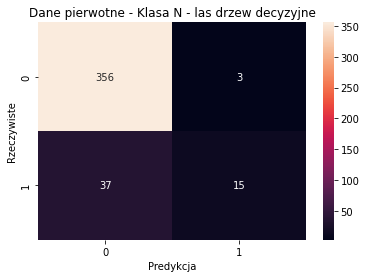

In [40]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa N - las drzew decyzyjne')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [42]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1')
f1score=fbeta_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], labels=['N0','N1'], average='binary',pos_label='N1', beta=1)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.288
Precision: 0.833
F1score: 0.429
